<b>Deeja Chhabra Assignment 2 [1001990775]</b>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal
from scipy.special import softmax
from mlxtend.plotting.decision_regions import plot_decision_regions

%matplotlib widget

<b> loading the IRIS dataset from sklearn</b>

In [2]:
iris= datasets.load_iris()
iris
feature = iris.data                                             #assigning input as features
target = iris.target                                            #assigning output(value to be predicted) as targets

In [3]:
print(iris.feature_names)
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size= 0.1, random_state = 1)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
print(len(feature_train), len(feature_test))                       #length of feature
print(len(target_train), len(target_test))                         #length of target

135 15
135 15


In [4]:
class Logistic():
    def __init__(self, epochs = 100, lr = 0.001):
        self.epochs = epochs
        self.lr = lr
        self.weights = None
        self.b = None
    def fit(self, X, Y):
        n_rows,n_columns = X.shape                   #no of features in training (4)                   #total no of rows
        
        print(n_rows, n_columns)
        self.weights = np.zeros(shape = (n_columns))        #[0,0,0,0]
        self.b = 0
        
        l_mse = []
        l_steps = []
        
        for i in range(self.epochs):
            
            pred = (X @ self.weights) + self.b                       #linear prediction
            Y_pred = 1/(1 + np.exp(-pred))                           #applying sigmoid on linear prediction
            #print( Y_pred)
            
            new_weights = (1/n_rows) * (X.T @ (Y_pred - Y))          #calculating new weights and bias
            new_b = (1/n_rows) * np.sum(Y_pred - Y)
            #print("new w", new_weights)
            
            
            self.weights -= self.lr*new_weights                      #updating new weights and bias
            self.b -= self.lr * new_b
            
            mse = np.mean((Y_pred - Y)**2)                           #calculating mean squared error over training 
            
            l_mse.append(mse)
            l_steps.append(i)
        plt.figure(figsize =(10,10))                                 #plotting figure loss vs steps
        plt.plot(l_steps, l_mse)
        plt.scatter(l_steps, l_mse)
        plt.xlabel("Step Number")
        plt.ylabel("Loss")
        plt.show()
        print("Train MSE", mse)
        
            
        #return mse, l_mse, l_steps
    def predict(self, X):                                           #function for predicting test value sset aside
        pred = (X @ self.weights) + self.b                     
        
        Y_pred = 1/(1 + np.exp(-pred))        
        preds = [1 if i > 0.5 else 0 for i in Y_pred]               #converting predictions to 0 or 1
        
        
        return preds

        
    
        

# Splitting dataset into 90:10

In [5]:
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.1, random_state = 1)
y_train0 = np.where(y_train==2,1,y_train)                         #making output into binary classes by changing 2 to 1 so we have only 0 and 1
y_test0 = np.where(y_test==2,1,y_test)

# Training

<b> all four features as input</b>

135 4


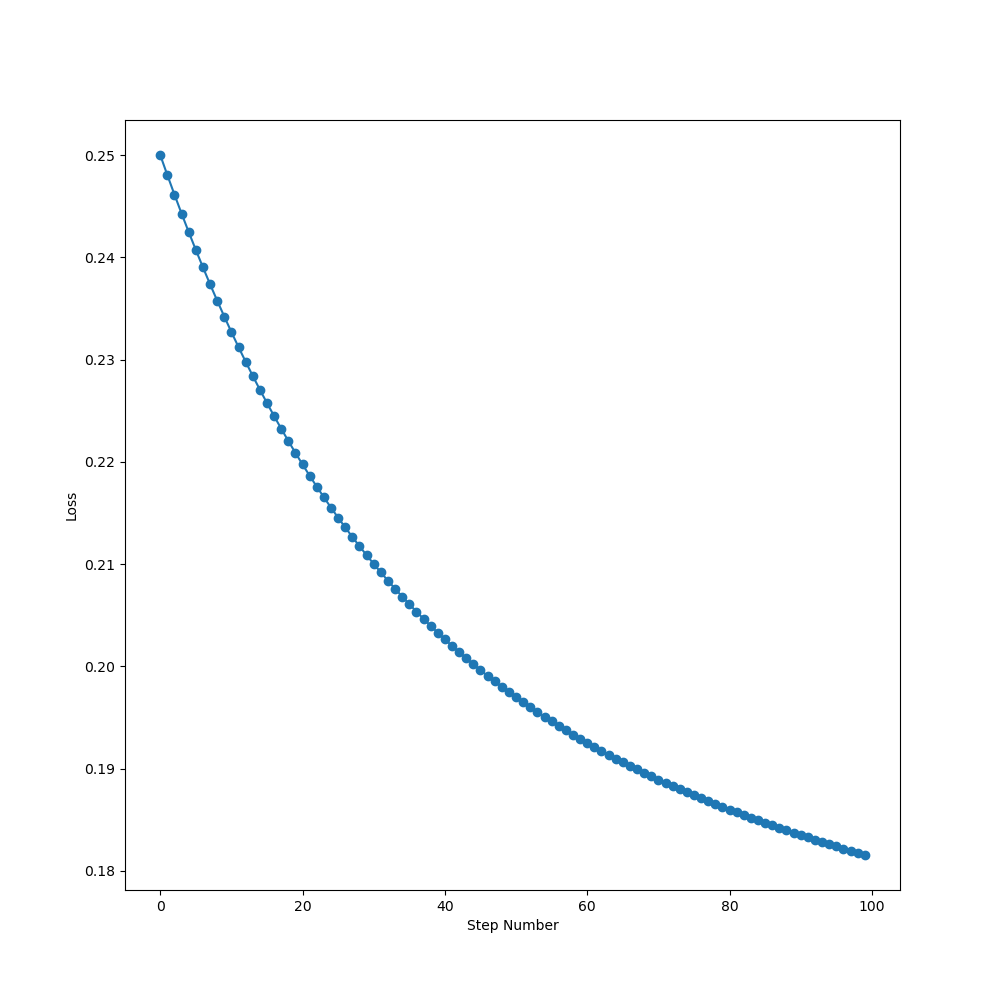

Train MSE 0.18156292939496346


In [6]:
log0 = Logistic()
log0.fit(x_train, y_train0)

<b>Testing all four features</b>

In [9]:
predict = log0.predict(x_test)

error = np.sum(np.abs(predict - y_test0))
print("No of Misclassifications", error)
print(f"Error = {(error / len(y_test0)) * 100:1.2f}%")
print("Accuracy",(np.sum(y_test0 == predict)/len(y_test0))*100 )

# acc = np.sum(y_test0 == predict)/len(y_test)
# print("Accuracy =", acc)

No of Misclassifications 5
Error = 33.33%
Accuracy 66.66666666666666


<b>Petal Length and Petal Width as Input</b>

135 2


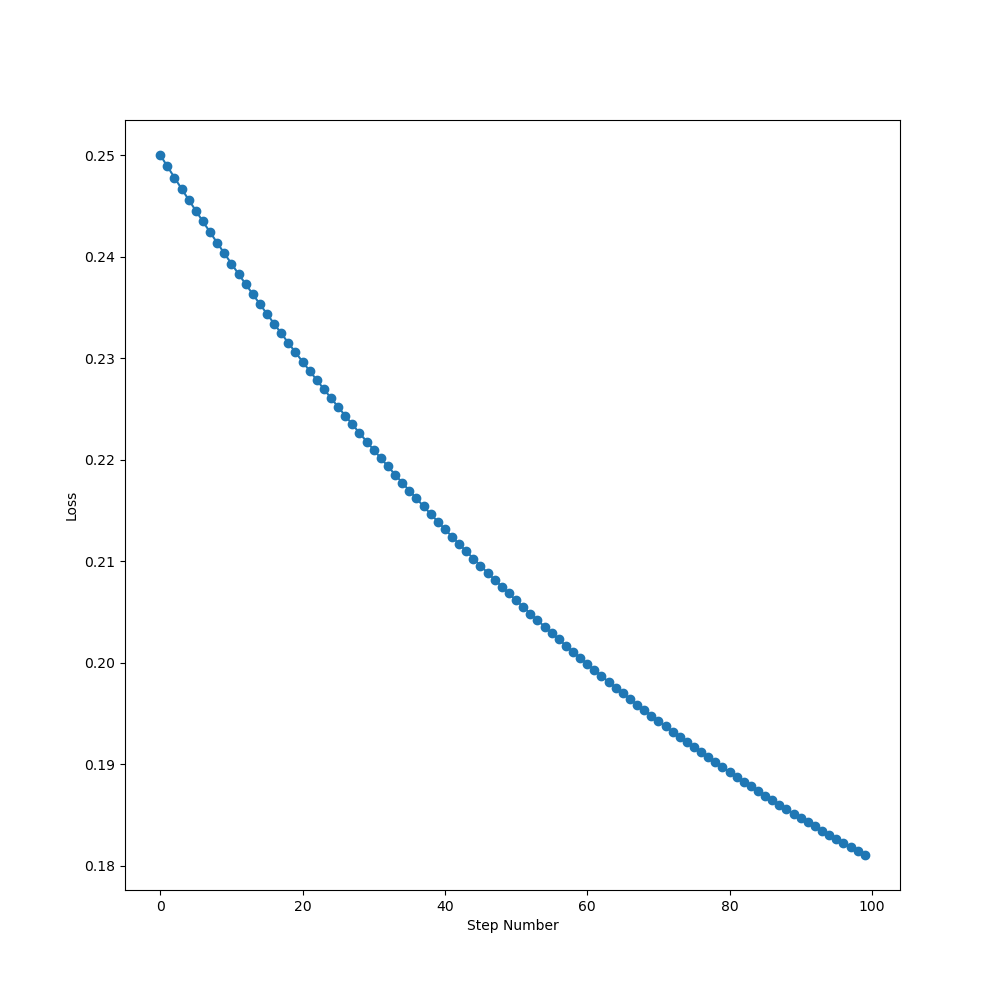

Train MSE 0.18106506964558303


In [10]:
log1 = Logistic()
X = x_train[:,2:]
log1.fit(X, y_train0)

<b> Testing Petal Length and Petal Width</b>

In [11]:
xt=x_test[:,2:]
predict = log1.predict(xt)
error = np.sum(np.abs(predict - y_test0))
print("No of Misclassifications", error)
print(f"Error = {(error / len(y_test0)) * 100:1.2f}%")
print("Accuracy",np.sum(y_test0 == predict)/len(y_test0)*100 )
# acc = np.sum(y_test0 == predict)/len(y_test)
# print("Accuracy =", acc)

No of Misclassifications 5
Error = 33.33%
Accuracy 66.66666666666666


<b> Sepal Length and Sepal Width as Input </b>

135 2


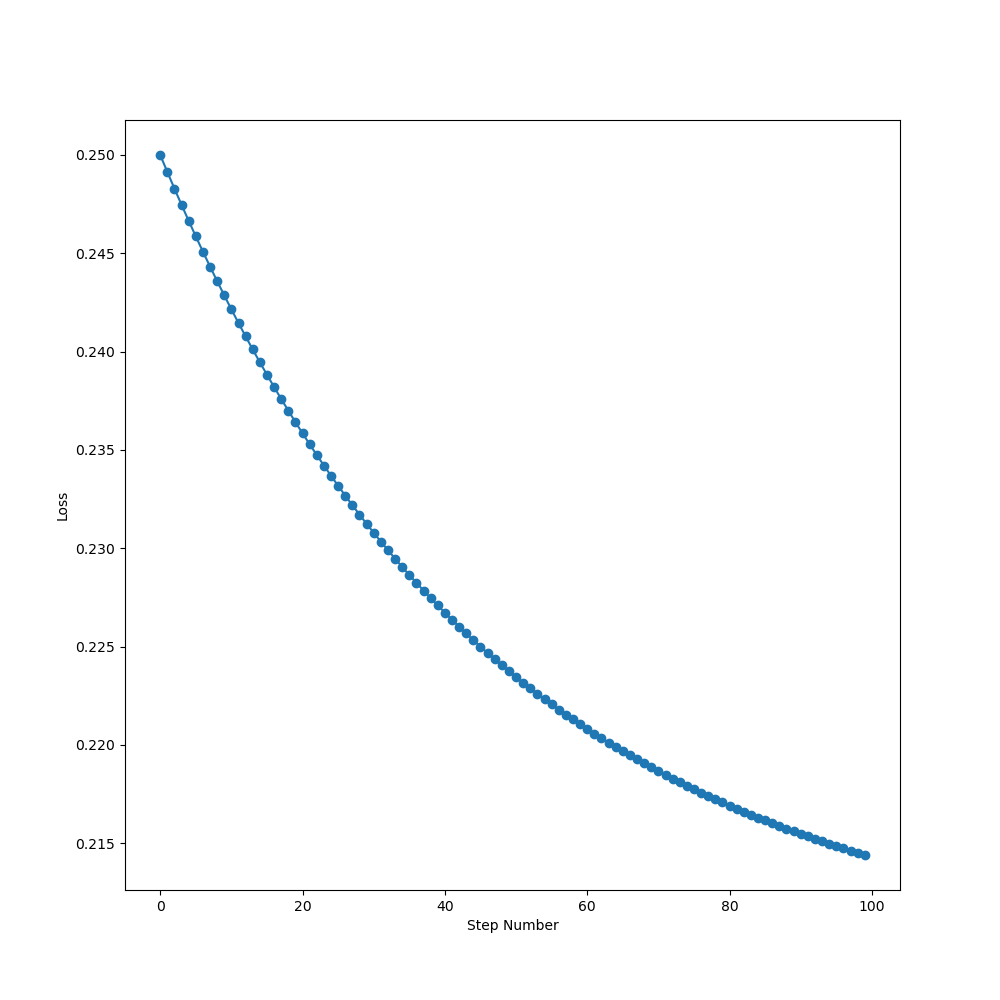

Train MSE 0.21439905149485503


In [12]:
log2 = Logistic()
X = x_train[:,0:2]
log2.fit(X, y_train0)


<b> Testing Sepal Length and Sepal Width</b>

In [13]:
xt=x_test[:,0:2]
predict = log2.predict(xt)
error = np.sum(np.abs(predict - y_test0))
print("No of Misclassifications", error)
print(f"Error = {(error / len(y_test0)) * 100:1.2f}%")
print("Accuracy",np.sum(y_test0 == predict)/len(y_test0)*100 )

# acc = np.sum(y_test0 == predict)/len(y_test)
# print("Accuracy =", acc)

No of Misclassifications 5
Error = 33.33%
Accuracy 66.66666666666666


#<b>Linear Discriminant Analysis</b>

In [30]:
def get_one_hot(targets, nb_classes):                                   #getting targets one hot encoded
    result = np.eye(nb_classes)[np.array(targets).reshape(-1)]
    return result.reshape(list(targets.shape)+[nb_classes])


class LinearDiscriminant:                                               #Linear Discriminant Class  
    def fit(self, data, targets):                                       
        num_classes = np.max(targets, axis=0) + 1                       #unique values in target 
        data = np.concatenate((np.ones((data.shape[0], 1)), data), axis=-1)  #prepending 1s
        targets = get_one_hot(targets, num_classes)              
        self.weights = np.linalg.inv(data.T @ data) @ data.T @ targets    
        #print(self.weights)
        
    def predict(self, x):
        
        
        x = np.concatenate((np.ones((x.shape[0], 1)), x), axis=-1)     # Adding constant for bias 
            
        return np.argmax(self.weights.T @ x.T, axis=0)

<b>Sepal Length and Sepal Width as input features</b>

No of Misclassifications 4
Error = 26.67%
accuracy 73.33333333333333


<AxesSubplot:>

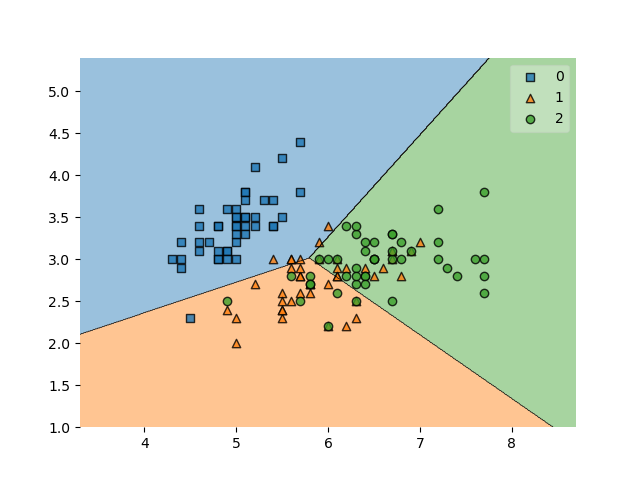

In [31]:
ld = LinearDiscriminant()
ld.fit(feature_train[:,0:2], target_train)

error = np.sum(np.abs(ld.predict(feature_test[:,0:2]) - target_test))
print("No of Misclassifications", error)
print(f"Error = {(error / len(target_test)) * 100:1.2f}%")
print("accuracy", ((len(target_test) - (error ))/ len(target_test))*100)
fig = plt.figure()
ax = plot_decision_regions(feature_train[:,0:2], target_train, ld)
fig.add_subplot(ax)

<b>Petal Length and petal Width as Input Features</b>

No of Misclassifications 6
Error = 40.00%
accuracy 60.0


<AxesSubplot:>

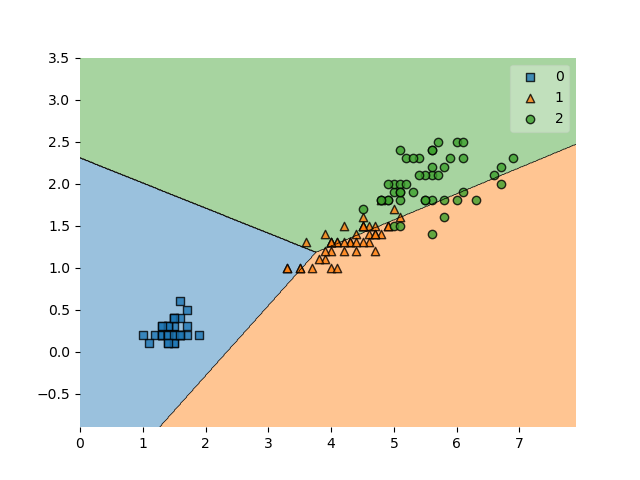

In [32]:
ld = LinearDiscriminant()
ld.fit(feature_train[:,2:], target_train)

error = np.sum(np.abs(ld.predict(feature_test[:,2:]) - target_test))
print("No of Misclassifications", error)
print(f"Error = {(error / len(target_test)) * 100:1.2f}%")
print("accuracy", ((len(target_test) - (error ))/ len(target_test))*100)
fig = plt.figure()
ax = plot_decision_regions(feature_train[:,2:], target_train, ld)
fig.add_subplot(ax)

<b> all features as Input</b>

In [33]:
ld = LinearDiscriminant()
ld.fit(feature_train, target_train)

error = np.sum(np.abs(ld.predict(feature_test) - target_test))
print("No of Misclassifications", error)
print(f"Error = {(error / len(target_test)) * 100:1.2f}%")
print("accuracy", ((len(target_test) - (error ))/ len(target_test))*100)

No of Misclassifications 4
Error = 26.67%
accuracy 73.33333333333333


<b>All features as Input and Sepal Length and Width as Input give the maximum accuracy in both the models. In logistic both give 60% accuracy while in LDA both give 73.33 % accuracy. So in all LDA is better compared to logistic in this case.</b>

Reference: Professor's Notes